# Part 1: Importing Libraries and Cleaning

In [29]:
import pandas as pd

books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/var/folders/v4/50bt2ht50r17swtdj020c0580000gn/T/ipykernel_18626/907619549.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


# Checking

Here we are making sure that the dataframes loaded in correctly.

In [30]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [31]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [32]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Check for null values

All of our datasets seem to have loaded in correctly. Now we can check for any null values, so we can potentially correct them.

In [33]:
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1)
books.loc[books.isnull().any(axis = 1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [34]:
books = books.drop(index = 118033)
books.loc[128890, 'Publisher'] = 'NovelBooks, Inc.'
books.loc[129037, 'Publisher'] = 'CreateSpace Independent Publishing Platform'
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'
books.loc[books.isnull().any(axis = 1)].sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: object

In [35]:
users = users.drop('Age', axis = 1)
users.loc[users.isnull().any(axis = 1)].sum()

User-ID     0
Location    0
dtype: object

In [36]:
ratings.loc[ratings.isnull().any(axis = 1)].sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

# Part 3: Data Exploration

Now, I was curious was what authors had the most publications, so I decided to check and make a graph.

In [37]:
authors_count = books.groupby('Book-Author').size().reset_index(name='Number of Books').sort_values(by='Number of Books', ascending=False)
authors_count

,Book-Author,Number of Books
1088,Agatha Christie,632
100924,William Shakespeare,567
91189,Stephen King,524
4567,Ann M. Martin,423
13497,Carolyn Keene,373
...,...,...
40342,J. Barnouin,1
40341,J. Barnes,1
40340,J. Barnard Gilmore,1
40339,J. B. West,1


<Axes: xlabel='Book-Author'>

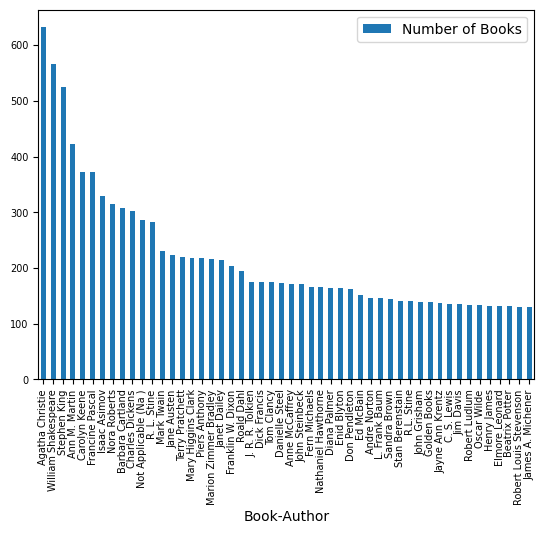

In [38]:
authors_count.head(50).plot.bar(x='Book-Author', rot=90, fontsize=7)

It seems that Agatha Christie has the most publicaitons out of any other author. Now let's see what publisher has the greates amount of publications.

In [39]:
publ_count = books.groupby('Publisher').size().reset_index(name='Number of Publications').sort_values(by='Number of Publications', ascending=False)
publ_count

,Publisher,Number of Publications
6584,Harlequin,7535
13668,Silhouette,4220
11763,Pocket,3905
1391,Ballantine Books,3783
1421,Bantam Books,3646
...,...,...
7341,Icaria Editorial,1
7342,Iceland Review,1
7345,"Icon Group International, Inc.",1
7346,Icon Publications,1


<Axes: xlabel='Publisher'>

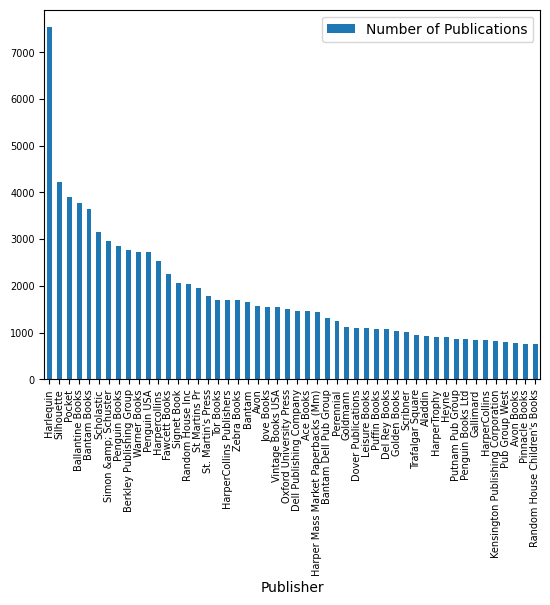

In [40]:
publ_count.head(50).plot.bar(x='Publisher', rot=90, fontsize=7)

Harlequin has the most publications by a very large margin as we can see. Now, I'm curious what user has rated the most amount of books.

In [41]:
user_rating_count = ratings.groupby('User-ID').size().reset_index(name='Number of Ratings').sort_values(by='Number of Ratings', ascending=False)
user_rating_count

,User-ID,Number of Ratings
4213,11676,13602
74815,198711,7550
58113,153662,6109
37356,98391,5891
13576,35859,5850
...,...,...
44878,118579,1
44877,118576,1
44876,118574,1
44875,118563,1


<Axes: xlabel='User-ID'>

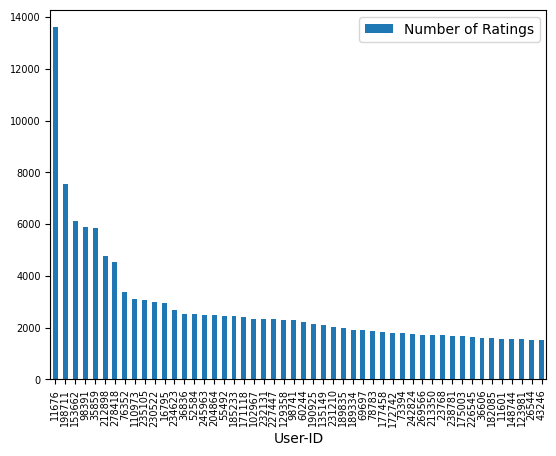

In [42]:
user_rating_count.head(50).plot.bar(x='User-ID', rot=90, fontsize=7)

Similar to our publishers, the number one user seems to have a very large margin between them and the second user. What location has the most amount of users?

In [43]:
location_user_count = users.groupby('Location').size().reset_index(name='Number of Users').sort_values(by='Number of Users', ascending=False)
location_user_count

,Location,Number of Users
29056,"london, england, united kingdom",2506
51109,"toronto, ontario, canada",2250
49594,"sydney, new south wales, australia",1744
31659,"melbourne, victoria, australia",1708
40494,"portland, oregon, usa",1629
...,...,...
23098,"huonville, tasmania, australia",1
23099,"huonville, tennessee, australia",1
23100,"hur, egy, egypt",1
23102,"hurley, new mexico, usa",1


<Axes: xlabel='Location'>

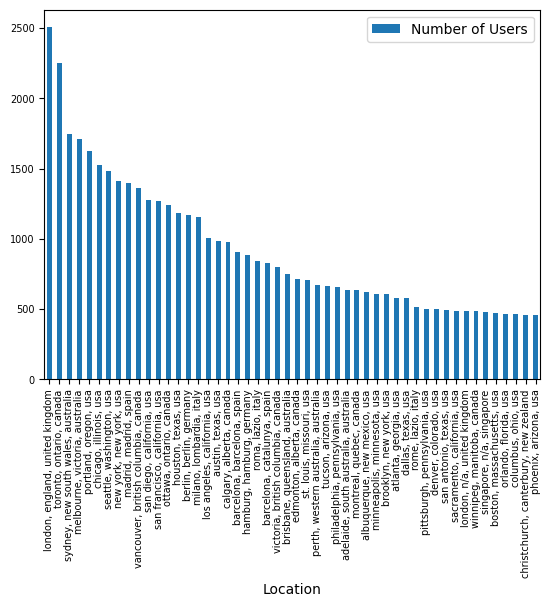

In [44]:
location_user_count.head(50).plot.bar(x='Location', rot=90, fontsize=7)

# Part 3: Combining Datasets and Finding Weighted Rating

I'll now merge datasets to create an optimal one that shows books with their  average ratings and users with their average ratings.

In [45]:
merged_df = pd.merge(books, ratings, on='ISBN')
avg_rating_df = merged_df.groupby('ISBN').agg({'Book-Rating' : ['mean', 'count']}).reset_index()
avg_rating_df.columns = ['ISBN', 'Average Rating', 'Number of Ratings']
books_rating_df = pd.merge(books, avg_rating_df, on='ISBN')
books_rating_df['Average Rating'] = books_rating_df['Average Rating'].round(1)
books_rating_df = books_rating_df.sort_values(by=['Number of Ratings','Average Rating'], ascending=[False,False])
books_rating_df = books_rating_df[books_rating_df['Average Rating'] >= 0.1]
books_rating_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average Rating,Number of Ratings
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,1.0,2502
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",4.5,1295
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,4.7,883
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,3.4,732
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,4.3,723
...,...,...,...,...,...,...,...
266668,1560540605,A Tenured Professor: A Novel,John Galbraith,1990,Thorndike Pr,1.0,1
267697,2264008997,Du contrat social: Discours sur les sciences e...,J-J Rousseau,1972,10-18,1.0,1
267738,0752830813,Treasury of Investment Wisdom,Bernice Cohen,1999,Orion Business Books,1.0,1
267949,0451167325,Personal Fouls,Peter Golenbeck,1990,New Amer Library (Mm),1.0,1


In [46]:
merged2_df = pd.merge(users, ratings, on='User-ID')
avg_rating2_df = merged2_df.groupby('User-ID').agg({'Book-Rating' : ['mean', 'count']}).reset_index()
avg_rating2_df.columns = ['User-ID', 'Average Rating', 'Number of Ratings']
user_rating_df = pd.merge(users, avg_rating2_df, on='User-ID')
user_rating_df['Average Rating'] = user_rating_df['Average Rating'].round(1)
user_rating_df = user_rating_df.sort_values(by=['Number of Ratings','Average Rating'], ascending=[False,False])
user_rating_df = user_rating_df[user_rating_df['Average Rating'] >= 0.1]
user_rating_df

,User-ID,Location,Average Rating,Number of Ratings
4213,11676,"n/a, n/a, n/a",4.6,13602
58113,153662,"ft. stewart, georgia, usa",2.8,6109
37356,98391,"morrow, georgia, usa",8.7,5891
13576,35859,"duluth, minnesota, usa",1.1,5850
105111,278418,"omaha, nebraska, usa",0.2,4533
...,...,...,...,...
104275,276264,"south bend, indiana, usa",1.0,1
105164,278540,"boone, iowa, usa",1.0,1
105216,278683,"fort worth, texas, usa",1.0,1
105237,278755,"herkimer, alaska, mexico",1.0,1


I noticed that there were some books that were rated low but had a high number of ratings, and some that had been rated high but had a low number of ratings. Seeing that this creates biases I applied a formula to calculate each books weighted rating.

In [47]:
books_rating_above_100_df = books_rating_df[books_rating_df['Number of Ratings'] >= 100]
books_rating_above_100_df['Weighted Rating'] = (
    (books_rating_above_100_df['Number of Ratings'] / (books_rating_above_100_df['Number of Ratings'] + 100) * 
    books_rating_above_100_df['Average Rating']) + (100 / (books_rating_above_100_df['Number of Ratings'] + 100) * 5)
) 
books_rating_above_100_df['Weighted Rating'] = books_rating_above_100_df['Weighted Rating'].round(1)
books_rating_above_100_df = books_rating_above_100_df.sort_values(by='Weighted Rating', ascending=False)
books_rating_above_100_df

/var/folders/v4/50bt2ht50r17swtdj020c0580000gn/T/ipykernel_18626/1212620825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_rating_above_100_df['Weighted Rating'] = (
/var/folders/v4/50bt2ht50r17swtdj020c0580000gn/T/ipykernel_18626/1212620825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_rating_above_100_df['Weighted Rating'] = books_rating_above_100_df['Weighted Rating'].round(1)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average Rating,Number of Ratings,Weighted Rating
3834,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,6.5,197,6.0
5426,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,6.5,194,6.0
5427,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,6.6,170,6.0
2805,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,6.4,168,5.9
5501,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,5.6,334,5.5
...,...,...,...,...,...,...,...,...
47,0425182908,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,1.9,203,2.9
2441,0440214041,The Pelican Brief,John Grisham,1993,Dell,2.5,523,2.9
7888,0425147363,Tom Clancy's Op-Center (Tom Clancy's Op Center...,Tom Clancy,1995,Berkley Publishing Group,1.4,134,2.9
1431,0140244824,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris,1996,Penguin Books,1.9,232,2.8


Now I'm removing the books that don't have 50 ratings and users who haven't rated at least 200 book, so that we are only using relevant books and trusted users. We will be using a collaborative filtering base approach for this part.

In [48]:
books_rating_over_50_df = books_rating_df[books_rating_df['Number of Ratings'] >= 50]
user_rating_over_200_df = user_rating_df[user_rating_df['Number of Ratings'] >= 200]

filtered_ratings = ratings[
    (ratings['ISBN'].isin(books_rating_over_50_df['ISBN'])) &
    (ratings['User-ID'].isin(user_rating_over_200_df['User-ID']))
]

filtered_df = pd.merge(filtered_ratings, books, on='ISBN')
pt = filtered_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 4: Working of our model

Using the sklearn cosine similarity to create cosine vectors and use the cosine similarities as our unit of similarity

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(pt)
similarities

array([[1.        , 0.        , 0.0543456 , ..., 0.        , 0.08924832,
        0.        ],
       [0.        , 1.        , 0.08846431, ..., 0.        , 0.        ,
        0.        ],
       [0.0543456 , 0.08846431, 1.        , ..., 0.1241088 , 0.14009737,
        0.09078407],
       ...,
       [0.        , 0.        , 0.1241088 , ..., 1.        , 0.11003213,
        0.12271145],
       [0.08924832, 0.        , 0.14009737, ..., 0.11003213, 1.        ,
        0.03274109],
       [0.        , 0.        , 0.09078407, ..., 0.12271145, 0.03274109,
        1.        ]])

Here we start making our function. Here we are finding the index of a certain book.

In [50]:
pt.index.get_loc("Zoya")

1961

We use the index from above to find the array of similarity values.

In [51]:
similarities[pt.index.get_loc("Zoya")]

array([0.        , 0.        , 0.1241088 , ..., 1.        , 0.11003213,
       0.12271145])

Taking the first five similarities from our array.

In [52]:
list(enumerate(similarities[pt.index.get_loc("Zoya")]))[1:6]

[(1, 0.0), (2, 0.12410880076887157), (3, 0.0), (4, 0.0), (5, 0.0)]

Sorting the array so that it only show the top five most similar books.

In [53]:
sorted(list(enumerate(similarities[pt.index.get_loc("Zoya")])), key=lambda x: x[1], reverse=True)[1:6]

[(1158, 0.6763515778262185),
 (635, 0.6230288304137823),
 (1677, 0.5911821240063588),
 (525, 0.5865115251599663),
 (753, 0.5724717439944823)]

Putting our function together.

In [54]:
def recommend_me(book_name):
    if book_name in pt.index:
        index = pt.index.get_loc(book_name)
        similarity_score = similarities[index]
        similar_list = sorted(list(enumerate(similarity_score)), key=lambda x: x[1],reverse=True)[1:11]
        print(f'Book Recommendations for {book_name}:')
        print('\n')
        for books in similar_list:
            print(pt.index[books[0]])
    else:
        print('Book was not found.')
        print('\n')

In [57]:
recommend_me("Harry Potter and the Prisoner of Azkaban (Book 3)")

Book Recommendations for Harry Potter and the Prisoner of Azkaban (Book 3):


Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Charlotte's Web (Trophy Newbery)
Interview with the Vampire
Anne of Windy Poplars (Anne of Green Gables Novels (Paperback))
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Anne's House of Dreams
